In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import math as m
import sklearn as sk



df_Ejercicio2 = pd.read_excel("20250528_BD_ejercicio_Unidad2.xlsx", engine= "openpyxl")

df_Ejercicio2

,ZONA,VENDEDOR,UNIDADES VENDIDAS,INGRESOS,GASTOS DE OPERACIÓN,INVENTARIOS
0,Zona 4,Vendedor 2,11,1595000,55000,3115
1,Zona 3,Vendedor 3,145,21025000,725000,2299
2,Zona 3,Vendedor 3,224,32480000,1120000,1326
3,Zona 1,Vendedor 2,344,49880000,1720000,4162
4,Zona 2,Vendedor 2,572,82940000,2860000,3769
...,...,...,...,...,...,...
89,Zona 1,Vendedor 1,9411,1364595000,47055000,1948
90,Zona 2,Vendedor 4,9529,1381705000,47645000,1917
91,Zona 4,Vendedor 4,9620,1394900000,48100000,307
92,Zona 1,Vendedor 1,9753,1414185000,48765000,2167


In [3]:
df_Ejercicio2.columns

Index(['ZONA', 'VENDEDOR', 'UNIDADES VENDIDAS', 'INGRESOS',
       'GASTOS DE OPERACIÓN', 'INVENTARIOS'],
      dtype='object')

In [4]:
# Asegurar que las columnas numéricas estén convertidas
columnas_num = ["UNIDADES VENDIDAS", "INGRESOS", "GASTOS DE OPERACIÓN", "INVENTARIOS"]
for col in columnas_num:
    df_Ejercicio2[col] = pd.to_numeric(df_Ejercicio2[col], errors="coerce")


In [5]:
df_Ejercicio2.rename(columns= {"UNIDADES VENDIDAS":"UNIDADES_VENDIDAS","INGRESOS":"INGRESOS", 
                               "GASTOS DE OPERACIÓN":"GASTOS_OP","INVENTARIOS":"INVENTARIOS"}, inplace=True)

df_Ejercicio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ZONA               94 non-null     object
 1   VENDEDOR           94 non-null     object
 2   UNIDADES_VENDIDAS  94 non-null     int64 
 3   INGRESOS           94 non-null     int64 
 4   GASTOS_OP          94 non-null     int64 
 5   INVENTARIOS        94 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.5+ KB


In [6]:
# Actualizar la lista de columnas numéricas para que coincidan con los nombres renombrados
columnas_nuevas = ["UNIDADES_VENDIDAS", "INGRESOS", "GASTOS_OP", "INVENTARIOS"]

# Agrupar por columnas categóricas y combinar valores numéricos (por ejemplo, sumando)
df_combinar = df_Ejercicio2.groupby(['ZONA', 'VENDEDOR'], as_index=False)[columnas_nuevas].sum()

# Mostrar el resultado
print(df_combinar.head())

     ZONA    VENDEDOR  UNIDADES_VENDIDAS    INGRESOS  GASTOS_OP  INVENTARIOS
0  Zona 1  Vendedor 1              48913  7092385000  244565000        11113
1  Zona 1  Vendedor 2              19038  2760510000   95190000        19473
2  Zona 1  Vendedor 3              24370  3533650000  121850000        14697
3  Zona 1  Vendedor 4              27263  3953135000  136315000        17305
4  Zona 2  Vendedor 1              29496  4276920000  147480000        11910


In [7]:
# Guardar la nueva tabla combinada en un archivo Excel
df_combinar.to_excel("datos_combinados.xlsx", index=False)

In [9]:
#Contar cuantos registros duplicados tenia la base
df_Ejercicio2.groupby(['ZONA', 'VENDEDOR']).size().reset_index(name='FRECUENCIA')

,ZONA,VENDEDOR,FRECUENCIA
0,Zona 1,Vendedor 1,7
1,Zona 1,Vendedor 2,6
2,Zona 1,Vendedor 3,6
3,Zona 1,Vendedor 4,6
4,Zona 2,Vendedor 1,6
5,Zona 2,Vendedor 2,6
6,Zona 2,Vendedor 3,6
7,Zona 2,Vendedor 4,6
8,Zona 3,Vendedor 1,5
9,Zona 3,Vendedor 2,6


In [11]:
#calcular el promedio de los datos combinados para las unidades vendidas
df_combinar.groupby(['ZONA', 'VENDEDOR'], as_index=False)[columnas_nuevas].mean()

,ZONA,VENDEDOR,UNIDADES_VENDIDAS,INGRESOS,GASTOS_OP,INVENTARIOS
0,Zona 1,Vendedor 1,48913.0,7.092385e+09,244565000.0,11113.0
1,Zona 1,Vendedor 2,19038.0,2.760510e+09,95190000.0,19473.0
2,Zona 1,Vendedor 3,24370.0,3.533650e+09,121850000.0,14697.0
3,Zona 1,Vendedor 4,27263.0,3.953135e+09,136315000.0,17305.0
4,Zona 2,Vendedor 1,29496.0,4.276920e+09,147480000.0,11910.0
5,Zona 2,Vendedor 2,17587.0,2.550115e+09,87935000.0,11710.0
6,Zona 2,Vendedor 3,32611.0,4.728595e+09,163055000.0,12462.0
7,Zona 2,Vendedor 4,46690.0,6.770050e+09,233450000.0,17723.0
8,Zona 3,Vendedor 1,25821.0,3.744045e+09,129105000.0,18267.0
9,Zona 3,Vendedor 2,44258.0,6.417410e+09,221290000.0,12348.0


In [14]:
#Redondear los valores del promedio calculado
df_resultado = df_combinar.groupby(['ZONA', 'VENDEDOR'], as_index=False)[columnas_nuevas].mean()
df_resultado[columnas_nuevas] = df_resultado[columnas_nuevas].round().astype(int)
print(df_resultado)

      ZONA    VENDEDOR  UNIDADES_VENDIDAS    INGRESOS  GASTOS_OP  INVENTARIOS
0   Zona 1  Vendedor 1              48913  7092385000  244565000        11113
1   Zona 1  Vendedor 2              19038  2760510000   95190000        19473
2   Zona 1  Vendedor 3              24370  3533650000  121850000        14697
3   Zona 1  Vendedor 4              27263  3953135000  136315000        17305
4   Zona 2  Vendedor 1              29496  4276920000  147480000        11910
5   Zona 2  Vendedor 2              17587  2550115000   87935000        11710
6   Zona 2  Vendedor 3              32611  4728595000  163055000        12462
7   Zona 2  Vendedor 4              46690  6770050000  233450000        17723
8   Zona 3  Vendedor 1              25821  3744045000  129105000        18267
9   Zona 3  Vendedor 2              44258  6417410000  221290000        12348
10  Zona 3  Vendedor 3              22265  3228425000  111325000        11135
11  Zona 3  Vendedor 4              27575  3998375000  137875000

In [15]:
# Guardar la nueva tabla de promedios combinada en un archivo Excel
df_resultado.to_excel("promedio_datos_combinados.xlsx", index=False)

In [ ]:
#Importar la nueva tabla datos_combinados para aplicar las medidas de resumen estadisticos
df_Medidas = pd.read_excel("datos_combinados.xlsx", engine= "openpyxl")

df_Medidas

,ZONA,VENDEDOR,UNIDADES_VENDIDAS,INGRESOS,GASTOS_OP,INVENTARIOS
0,Zona 1,Vendedor 1,48913,7092385000,244565000,11113
1,Zona 1,Vendedor 2,19038,2760510000,95190000,19473
2,Zona 1,Vendedor 3,24370,3533650000,121850000,14697
3,Zona 1,Vendedor 4,27263,3953135000,136315000,17305
4,Zona 2,Vendedor 1,29496,4276920000,147480000,11910
5,Zona 2,Vendedor 2,17587,2550115000,87935000,11710
6,Zona 2,Vendedor 3,32611,4728595000,163055000,12462
7,Zona 2,Vendedor 4,46690,6770050000,233450000,17723
8,Zona 3,Vendedor 1,25821,3744045000,129105000,18267
9,Zona 3,Vendedor 2,44258,6417410000,221290000,12348


In [ ]:
 # Calcular estadísticas resumen
est_resumen = df_Medidas.describe().astype(int)
media = df_Medidas.mean(numeric_only=True).astype(int)
mediana = df_Medidas.median(numeric_only=True).astype(int)


print("=== ESTADÍSTICAS RESUMEN ===")
print(est_resumen)
print("\n=== La media para los datos son ===")
print(media)
print("\n=== La mediana para los datos son ===")
print(mediana)


=== ESTADÍSTICAS RESUMEN ===
       UNIDADES_VENDIDAS    INGRESOS  GASTOS_OP  INVENTARIOS
count                 16          16         16           16
mean               29919  4338264062  149595312        14727
std                 9406  1363956310   47032976         3815
min                17587  2550115000   87935000         9393
25%                24182  3506498750  120913750        11566
50%                27419  3975755000  137095000        13579
75%                33049  4792141250  165246250        18269
max                48913  7092385000  244565000        19968

=== La media para los datos son ===
UNIDADES_VENDIDAS         29919
INGRESOS             4338264062
GASTOS_OP             149595312
INVENTARIOS               14727
dtype: int64

=== La mediana para los datos son ===
UNIDADES_VENDIDAS         27419
INGRESOS             3975755000
GASTOS_OP             137095000
INVENTARIOS               13579
dtype: int64


In [ ]:
#quartiles = df_Medidas.quantile([0.25, 0.5, 0.75])
cuartiles = df_Medidas[columnas_nuevas].quantile([0.25, 0.5, 0.75]).astype(int)

std_values = df_Medidas[columnas_nuevas].std().astype(int)

print("\n=== Desviación estándar de las columnas numéricas ===")
print(std_values)
print("=== Los cuartiles de medidas son: ===")
print(cuartiles)


=== Desviación estándar de las columnas numéricas ===
UNIDADES_VENDIDAS          9406
INGRESOS             1363956310
GASTOS_OP              47032976
INVENTARIOS                3815
dtype: int64


In [21]:
# Encontrar el vendedor con más ingresos por zona
top_ingresos = df_Medidas.loc[df_Medidas.groupby('ZONA')['INGRESOS'].idxmax()]
print("\n=== Vendedor con más ingresos por zona ===")
print(top_ingresos[['ZONA', 'VENDEDOR', 'INGRESOS']]) 


=== Vendedor con más ingresos por zona ===
      ZONA    VENDEDOR    INGRESOS
0   Zona 1  Vendedor 1  7092385000
7   Zona 2  Vendedor 4  6770050000
9   Zona 3  Vendedor 2  6417410000
12  Zona 4  Vendedor 1  4982780000


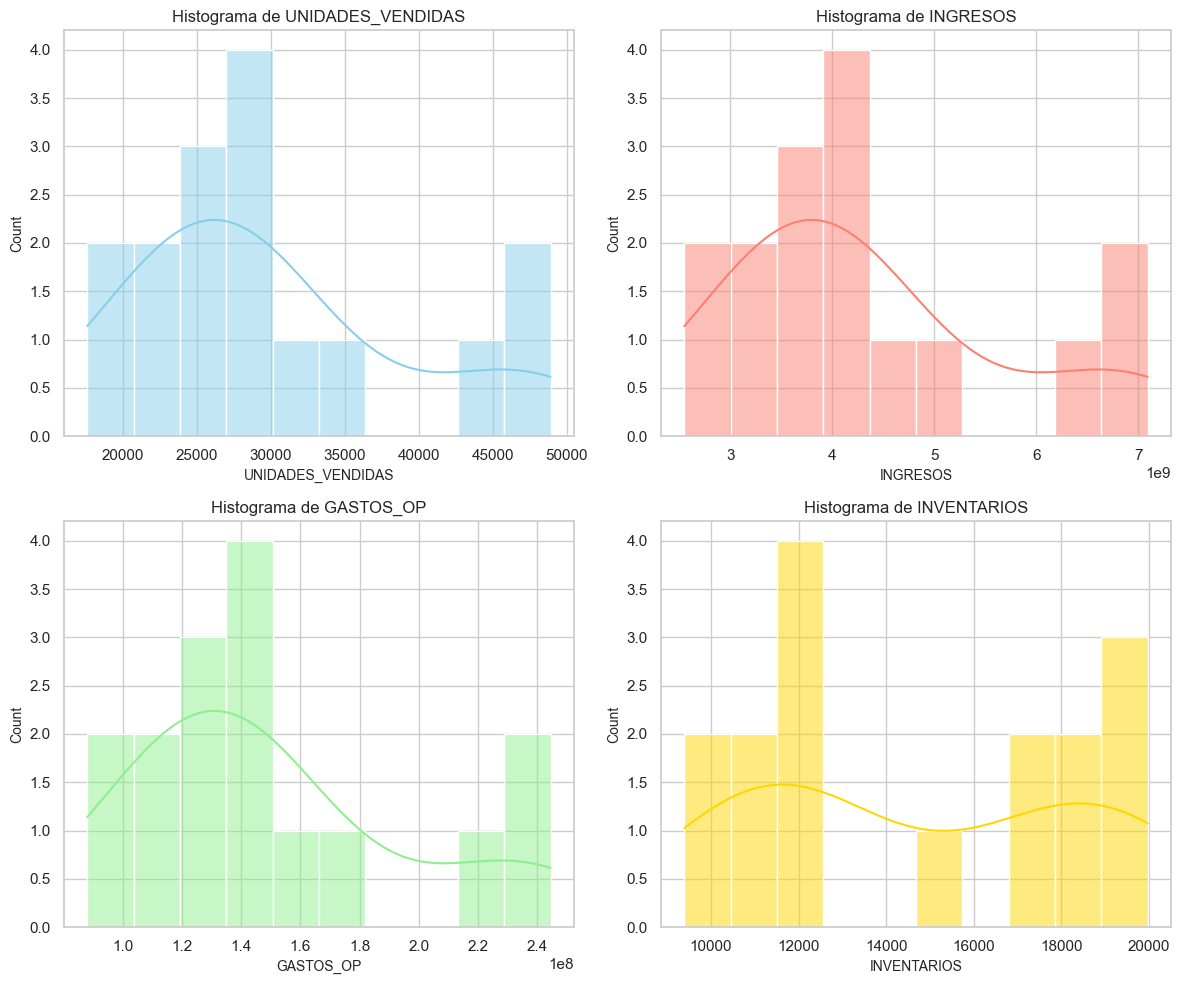

C:\Users\user\AppData\Local\Temp\ipykernel_12604\354098242.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_Medidas, x='ZONA', y='UNIDADES_VENDIDAS', estimator='mean', errorbar=None, palette='Set2')


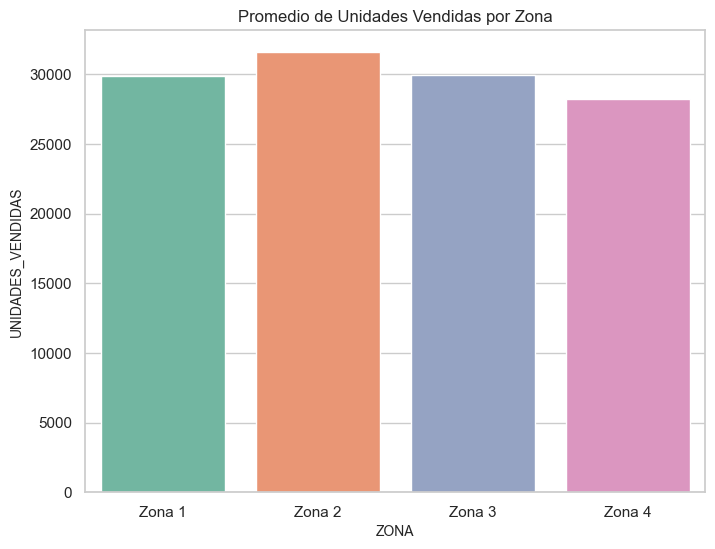

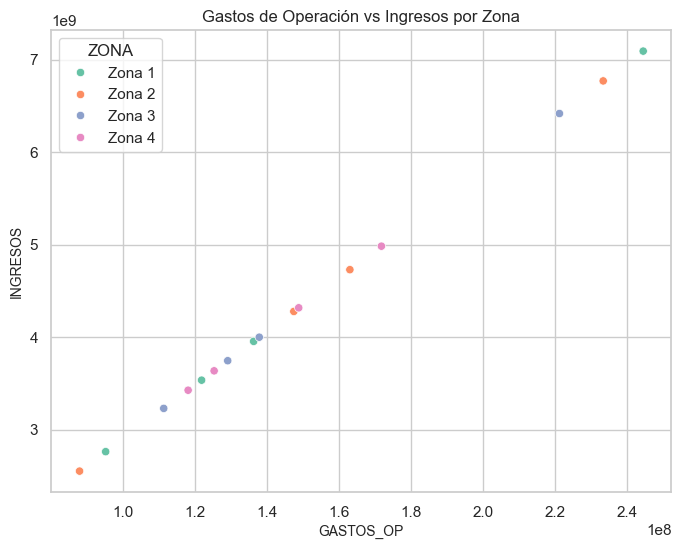

C:\Users\user\AppData\Local\Temp\ipykernel_12604\354098242.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Medidas, x='ZONA', y='INVENTARIOS', palette='Set2')


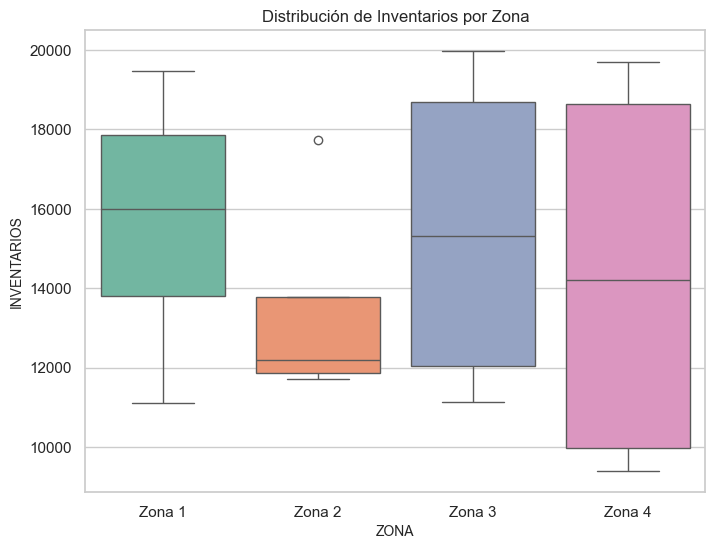

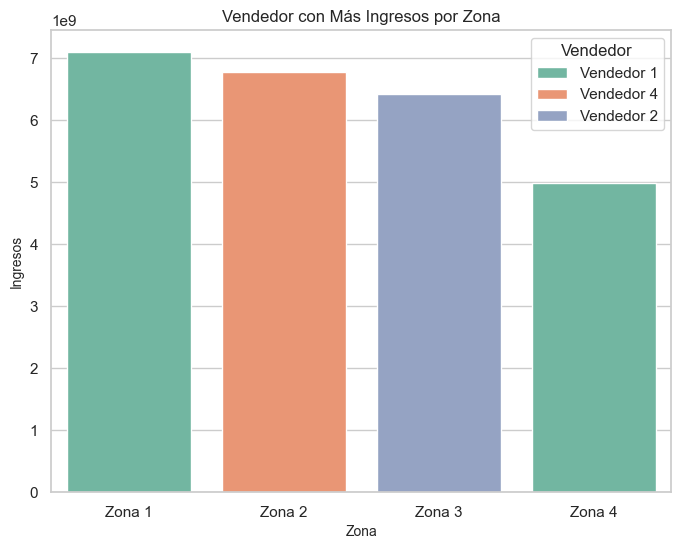

C:\Users\user\AppData\Local\Temp\ipykernel_12604\354098242.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_Medidas, x='ZONA', y='INGRESOS', marker='o', palette='Set2')


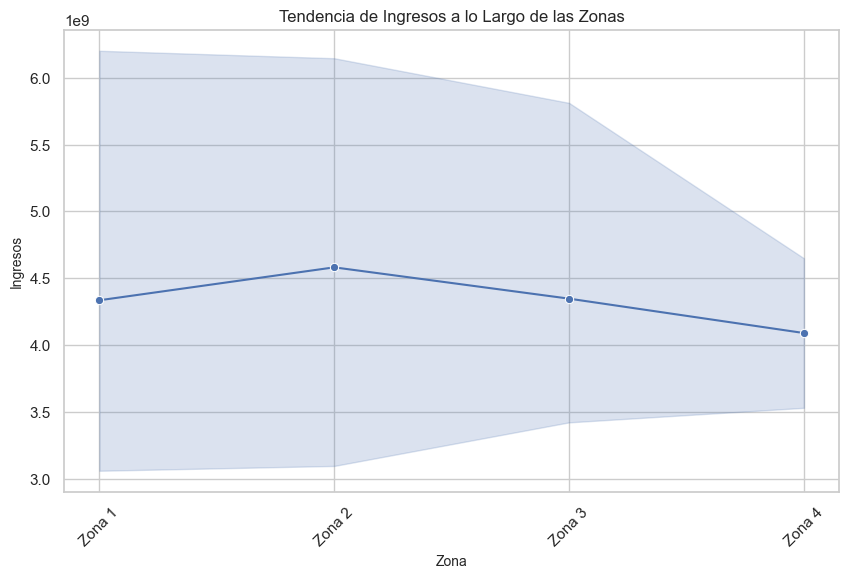

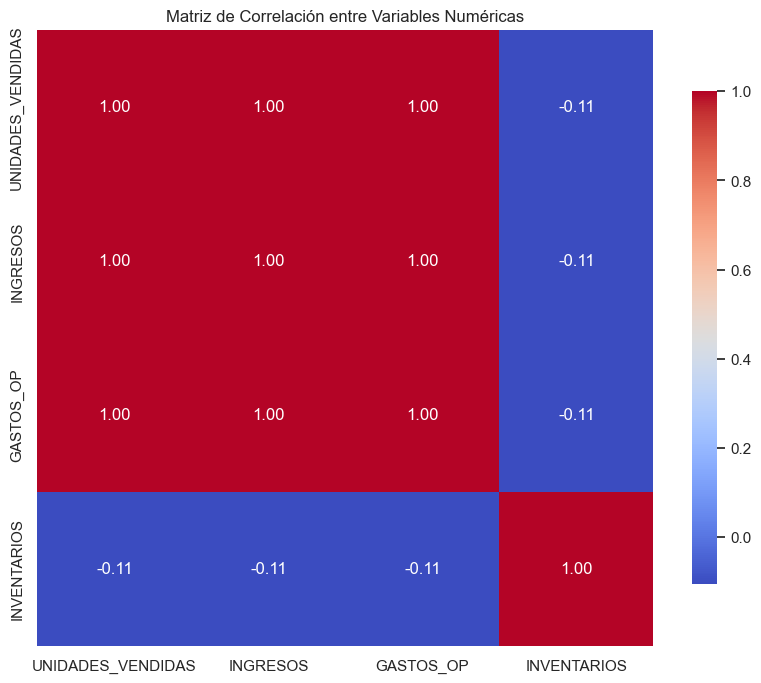

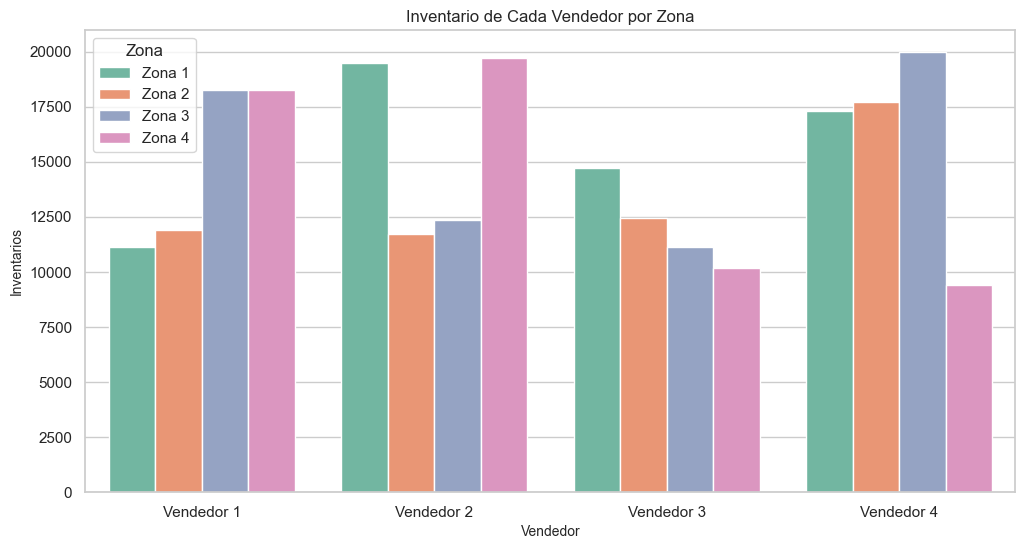

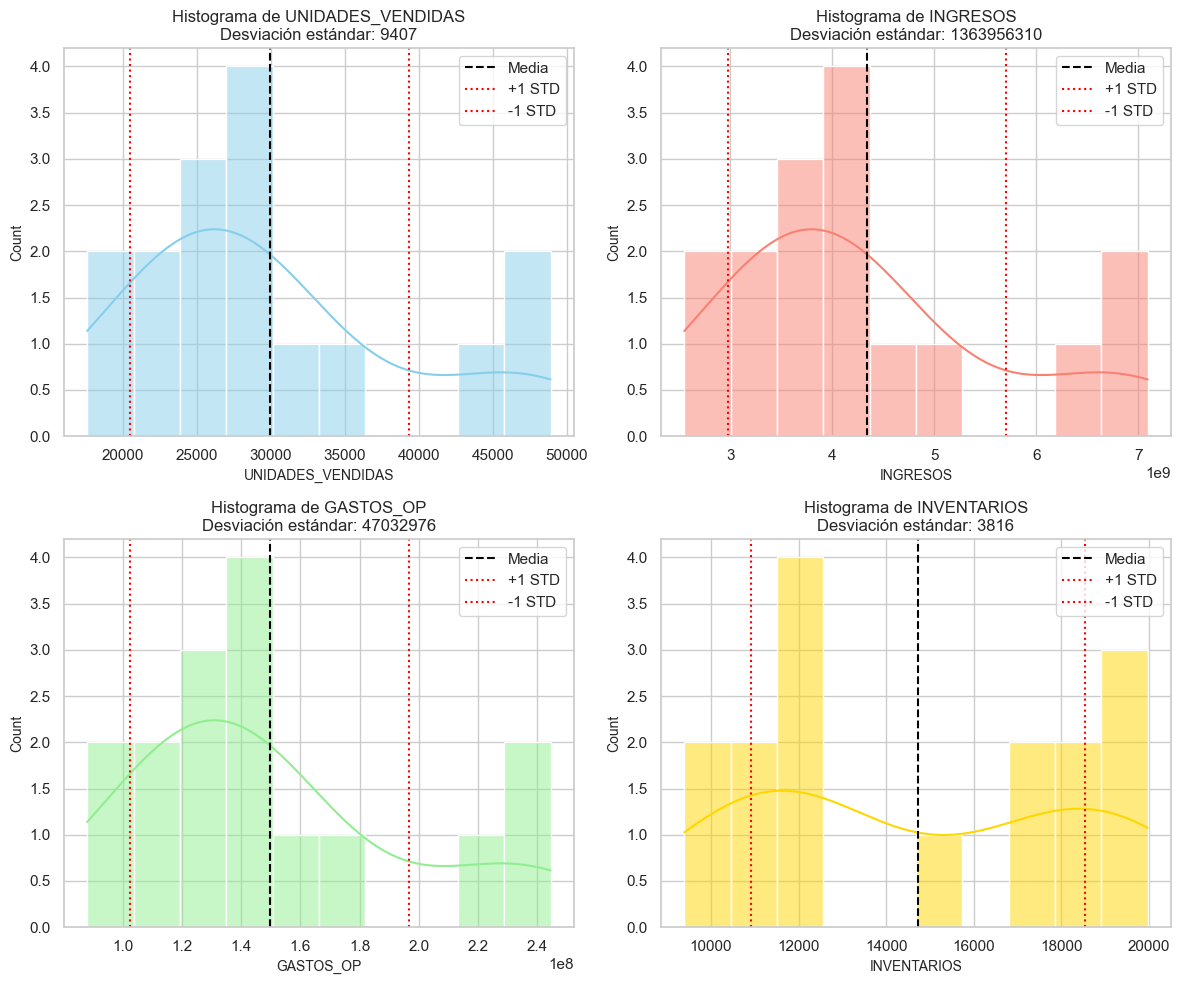

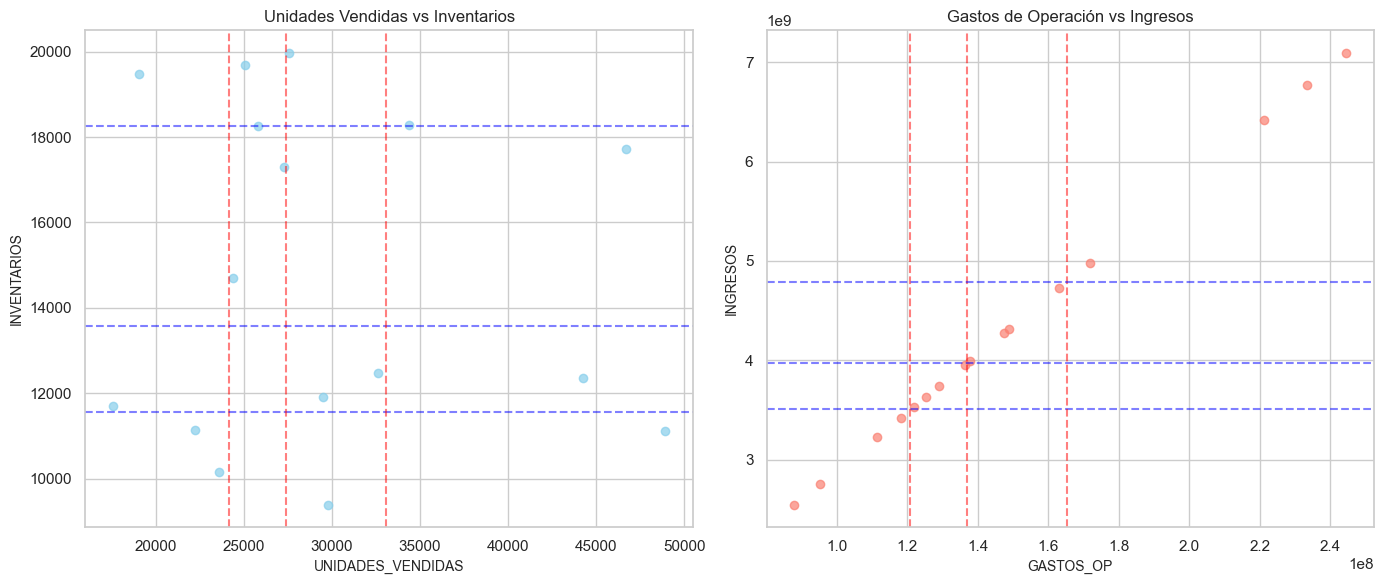

In [30]:
# Configuraciones de fondo y tamaño de letra para vizualizacion
sns.set(style="whitegrid")
plt.rcParams["axes.labelsize"] = 10

# 1. Histograma para cada variable numérica en df_Medidas
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas_nuevas):
    plt.subplot(2, 2, i+1)
    colores = ['skyblue', 'salmon', 'lightgreen', 'gold']
    sns.histplot(df_Medidas[col], bins=10, kde=True, color=colores[i])
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

# 2. Gráfico de barras: Unidades vendidas promedio por zona
plt.figure(figsize=(8, 6))
sns.barplot(data=df_Medidas, x='ZONA', y='UNIDADES_VENDIDAS', estimator='mean', errorbar=None, palette='Set2')
plt.title('Promedio de Unidades Vendidas por Zona')
plt.show()

# 3. Gráfico de dispersión: INGRESOS vs GASTOS DE OPERACIÓN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_Medidas, x='GASTOS_OP', y='INGRESOS', hue='ZONA', palette='Set2')
plt.title('Gastos de Operación vs Ingresos por Zona')
plt.show()

# 4. Boxplot para comparar la distribución de INVENTARIOS por zona
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_Medidas, x='ZONA', y='INVENTARIOS', palette='Set2')
plt.title('Distribución de Inventarios por Zona')
plt.show()

# 5. Gráfico de barras para el vendedor que más ingresos tuvo en cada zona
plt.figure(figsize=(8, 6))
sns.barplot(data=top_ingresos, x='ZONA', y='INGRESOS', hue='VENDEDOR', palette='Set2')
plt.title('Vendedor con Más Ingresos por Zona')
plt.xlabel('Zona')
plt.ylabel('Ingresos')
plt.legend(title='Vendedor')
plt.show()

# 6. Gráfico de líneas para mostrar la tendencia de ingresos a lo largo de las zonas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_Medidas, x='ZONA', y='INGRESOS', marker='o', palette='Set2')
plt.title('Tendencia de Ingresos a lo Largo de las Zonas')
plt.xlabel('Zona')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()

# 7. Gráfico de calor para visualizar la correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df_Medidas[columnas_nuevas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# 8. Gráfico de barras para comparar el inventario de cada vendedor por zona
plt.figure(figsize=(12, 6))
sns.barplot(data=df_Medidas, x='VENDEDOR', y='INVENTARIOS', hue='ZONA', palette='Set2')
plt.title('Inventario de Cada Vendedor por Zona')
plt.xlabel('Vendedor')
plt.ylabel('Inventarios')
plt.legend(title='Zona')
plt.show()

# 9. Grafica Histograma de la desviación estándar
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas_nuevas):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_Medidas[col], bins=10, kde=True, color=colores[i])
    std = df_Medidas[col].std()
    mean = df_Medidas[col].mean()
    plt.axvline(mean, color='black', linestyle='--', label='Media')
    plt.axvline(mean + std, color='red', linestyle=':', label='+1 STD')
    plt.axvline(mean - std, color='red', linestyle=':', label='-1 STD')
    plt.title(f'Histograma de {col}\nDesviación estándar: {std:.0f}')
    plt.legend()
plt.tight_layout()
plt.show()

#10 Graficar UNIDADES_VENDIDAS vs INVENTARIOS y GASTOS_OP vs INGRESOS usando los cuartiles

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# UNIDADES_VENDIDAS vs INVENTARIOS
axes[0].scatter(df_Medidas['UNIDADES_VENDIDAS'], df_Medidas['INVENTARIOS'], color=colores[0], alpha=0.7)
axes[0].set_xlabel('UNIDADES_VENDIDAS')
axes[0].set_ylabel('INVENTARIOS')
axes[0].set_title('Unidades Vendidas vs Inventarios')

# Dibujar líneas de cuartiles
for q in cuartiles.index:
    axes[0].axvline(cuartiles.loc[q, 'UNIDADES_VENDIDAS'], color='red', linestyle='--', alpha=0.5)
    axes[0].axhline(cuartiles.loc[q, 'INVENTARIOS'], color='blue', linestyle='--', alpha=0.5)

# GASTOS_OP vs INGRESOS
axes[1].scatter(df_Medidas['GASTOS_OP'], df_Medidas['INGRESOS'], color=colores[1], alpha=0.7)
axes[1].set_xlabel('GASTOS_OP')
axes[1].set_ylabel('INGRESOS')
axes[1].set_title('Gastos de Operación vs Ingresos')

# Dibujar líneas de cuartiles
for q in cuartiles.index:
    axes[1].axvline(cuartiles.loc[q, 'GASTOS_OP'], color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(cuartiles.loc[q, 'INGRESOS'], color='blue', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()